In [35]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset from UCI Machine Learning Repository
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 

# data (as pandas dataframes) 
data = online_retail.data.features 
data_targets = online_retail.data.targets 
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Exploring the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [4]:
# metadata 
print(online_retail.metadata)  

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [5]:
# variable information 
print(online_retail.variables)

          name     role         type demographic  \
0    InvoiceNo       ID  Categorical        None   
1    StockCode       ID  Categorical        None   
2  Description  Feature  Categorical        None   
3     Quantity  Feature      Integer        None   
4  InvoiceDate  Feature         Date        None   
5    UnitPrice  Feature   Continuous        None   
6   CustomerID  Feature  Categorical        None   
7      Country  Feature  Categorical        None   

                                         description     units missing_values  
0  a 6-digit integral number uniquely assigned to...      None             no  
1  a 5-digit integral number uniquely assigned to...      None             no  
2                                       product name      None             no  
3  the quantities of each product (item) per tran...      None             no  
4  the day and time when each transaction was gen...      None             no  
5                             product price per uni

# **Fields and Data Types 🛒**

Online Retail dataset capturing transactional data of a UK-based online retailer from December 2010 to December 2011. It includes detailed invoice-level information about products purchased, quantities, unit prices, customer identifiers, and country of purchase. This dataset is commonly used for retail analytics, customer segmentation, and RFM analysis.

## **Data Dictionary**

| **Parameter** | **Description**                                                                                      |
| ------------- | ---------------------------------------------------------------------------------------------------- |
| `Description` | Text description of the product/item purchased (e.g., "WHITE HANGING HEART T-LIGHT HOLDER").         |
| `Quantity`    | Number of units of the product purchased per transaction (can be negative for returns).              |
| `InvoiceDate` | Timestamp of the transaction/invoice (format: `yyyy-mm-dd hh:mm:ss`).                                |
| `UnitPrice`   | Price per unit of the product at the time of the transaction, in GBP (British Pound).                |
| `CustomerID`  | Unique identifier assigned to each customer (nullable; some transactions are missing customer info). |
| `Country`     | Country name where the customer resides or where the purchase was made.                              |



# Understanding Data

In [6]:
# Comprehensive dataset overview
def dataset_overview(df):
    print(f"\n{' Dataset Overview ':=^80}")
    print(f"Shape: {df.shape}")
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDescriptive Statistics:")
    print(df.describe(include='all'))
    print("\nUnique Counts:")
    print(pd.DataFrame({col: df[col].nunique() for col in df.columns}, index=['Unique Count']).T)
dataset_overview(data)


=============================== Dataset Overview ===============================
Shape: (541909, 6)

Data Types:
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Missing Values:
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Descriptive Statistics:
                               Description       Quantity       InvoiceDate  \
count                               540455  541909.000000            541909   
unique                                4223            NaN             23260   
top     WHITE HANGING HEART T-LIGHT HOLDER            NaN  10/31/2011 14:41   
freq                                  2369            NaN              1114   
mean                                   NaN       9.552250               NaN   
std                                    NaN     218.081158               N

In [7]:
# Display column names of the dataset
data.columns.values

array(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country'], dtype=object)

In [8]:
# Count the ocurrences of each Country in the dataset
data.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


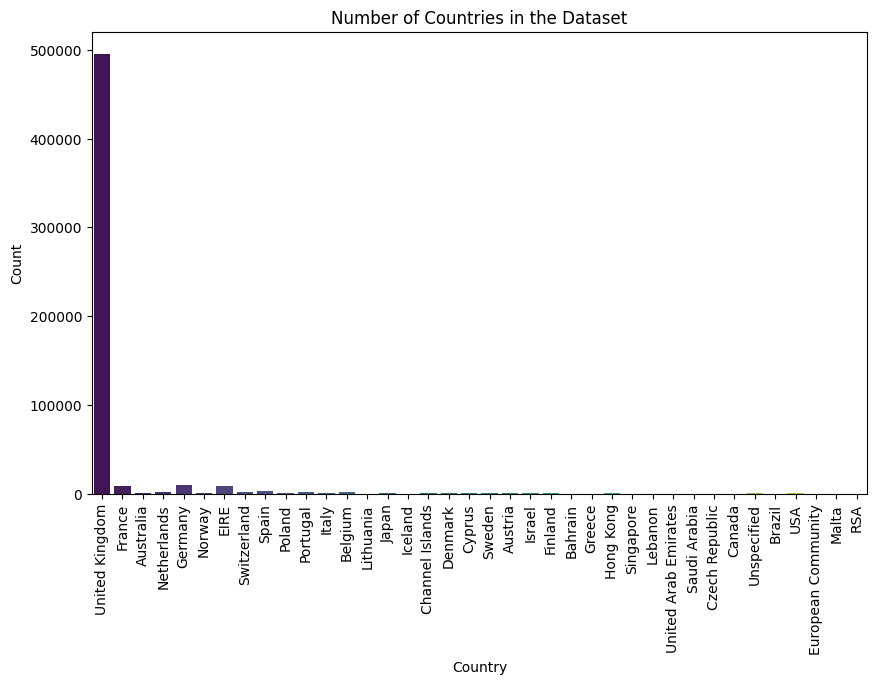

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='Country',data=data, palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of Countries in the Dataset")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

# Missing values and negatives quantities

In [10]:
# Check for missing values
print(data.isnull().sum())

Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [11]:
# Remove returns/negative quantities
data = data[data['Quantity'] > 0]

# # Remove transactions without CustomerID
data = data[data["CustomerID"].notna()]

# Convert to integer
data['CustomerID'] = data['CustomerID'].astype(int)  

In [12]:
# Check for missing values
print(data.isnull().sum())

Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# Prepare the dataset

In [18]:
# Prepare the data for analysis
def prepare_data():
    online_retail = fetch_ucirepo(id=352) 
    data = online_retail.data.features
    
    # Convert InvoiceDate to datetime
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
    
    # Data cleaning

    # Remove returns/negative quantities
    data = data[data['Quantity'] > 0]  
    # Remove transactions without CustomerID
    data = data[data['CustomerID'].notna()]  
    # Convert to integer
    data['CustomerID'] = data['CustomerID'].astype(int)  
    
    return data

data = prepare_data()

# Feature Engineering for Retention Analysis

In [ ]:
# Create features needed for retention analysis
def create_retention_features(df):
    # Calculate total spend per transaction
    df['TotalSpend'] = df['Quantity'] * df['UnitPrice']
    
    # Extract year-month for cohort analysis
    df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')
    
    # Find first purchase date for each customer
    first_purchase = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
    first_purchase.columns = ['CustomerID', 'FirstPurchaseDate']
    df = pd.merge(df, first_purchase, on='CustomerID', how='left')
    
    # Calculate customer tenure (days since first purchase)
    df['TenureDays'] = (df['InvoiceDate'] - df['FirstPurchaseDate']).dt.days
    
    # Create cohort based on first purchase month
    df['Cohort'] = df['FirstPurchaseDate'].dt.to_period('M')
    
    return df

data = create_retention_features(data)

# Retention Rate Calculation

In [20]:
# Calculate monthly retention rate and related metrics
def calculate_retention_metrics(df):
    """Calculate monthly retention rate and related metrics"""
    # Count unique customers per cohort and period
    cohort_data = df.groupby(['Cohort', 'InvoiceYearMonth'])['CustomerID'].nunique().reset_index()
    cohort_data.columns = ['Cohort', 'YearMonth', 'CustomerCount']
    
    # Calculate retention matrix
    cohort_counts = cohort_data.pivot_table(index='Cohort', 
                                            columns='YearMonth', 
                                            values='CustomerCount')
    
    # Calculate retention rates
    cohort_sizes = cohort_counts.iloc[:, 0]
    retention_matrix = cohort_counts.divide(cohort_sizes, axis=0)
    
    return cohort_data, retention_matrix

cohort_data, retention_matrix = calculate_retention_metrics(data)

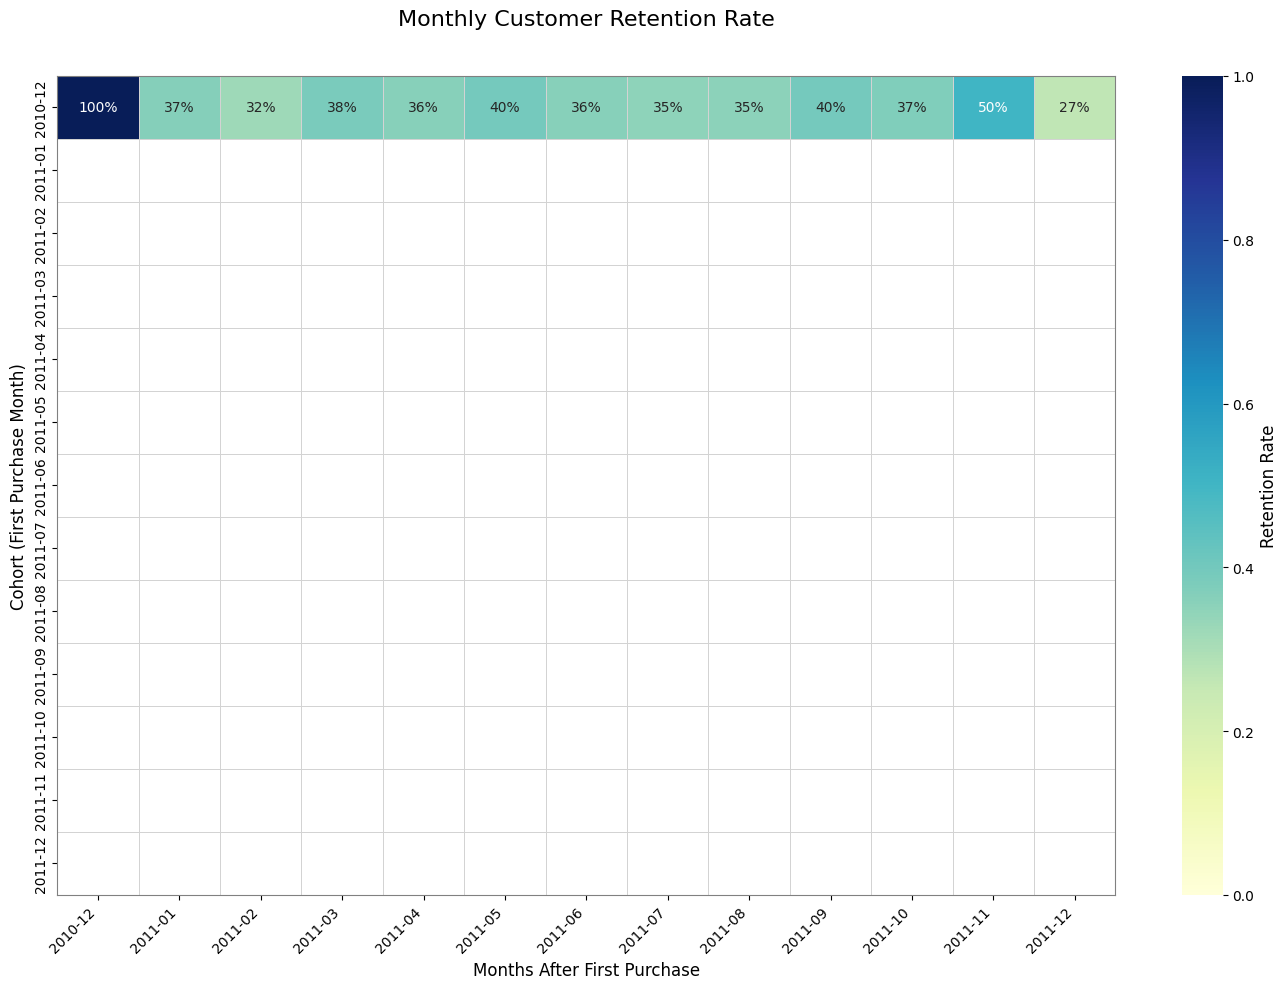

In [ ]:
# Visualization: Retention Heatmap
def plot_retention_heatmap(retention_matrix):
    plt.figure(figsize=(14, 10))
    
    # Crear máscara para valores NaN y ceros (si es necesario)
    mask = retention_matrix.isnull()
    
    # Personalizar la paleta de colores
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    
    # Crear el heatmap con mejor formato
    ax = sns.heatmap(retention_matrix, 
                    annot=True, 
                    fmt='.0%', 
                    cmap=cmap,
                    mask=mask,
                    linewidths=0.5,
                    linecolor='lightgray',
                    cbar_kws={'label': 'Retention Rate'},
                    vmin=0,  # Valor mínimo para la escala de colores
                    vmax=1)  # Valor máximo para la escala de colores
    
    # Mejorar título y etiquetas
    plt.title('Monthly Customer Retention Rate\n', 
                fontsize=16, pad=20)
    plt.ylabel('Cohort (First Purchase Month)', fontsize=12)
    plt.xlabel('Months After First Purchase', fontsize=12)
    
    # Rotar y alinear las etiquetas del eje x
    plt.xticks(rotation=45, ha='right')
    
    # Ajustar tamaño de fuente de las anotaciones
    ax.figure.axes[-1].yaxis.label.set_size(12)  # Barra de color
    
    # Añadir líneas de cuadrícula más visibles
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_color('gray')
    
    # Ajustar diseño para evitar cortes
    plt.tight_layout()
    plt.show()

plot_retention_heatmap(retention_matrix)

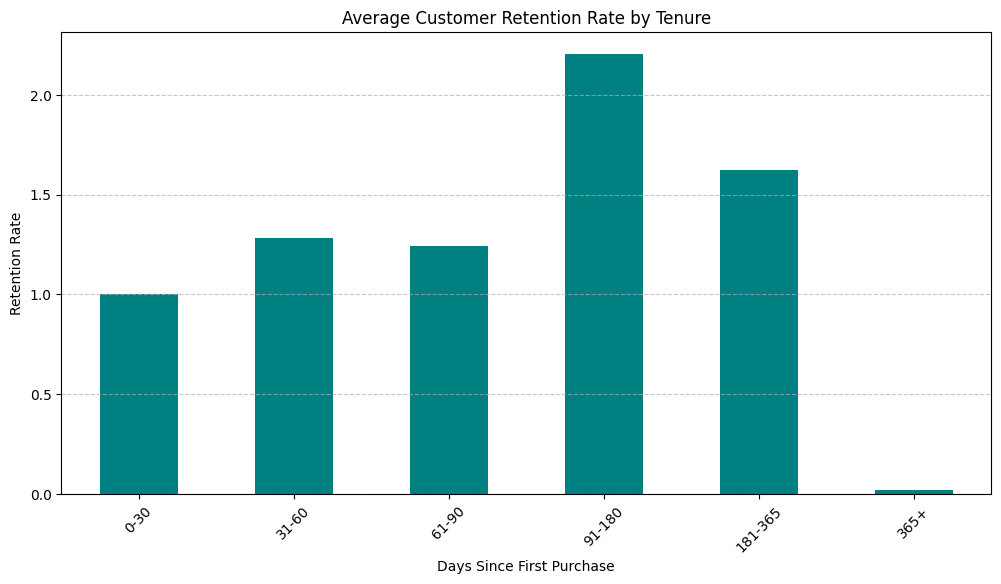

In [24]:
# Plot retention rate over time since first purchase
def plot_time_based_retention(df):
    # Bin customers by tenure days
    df['TenureBin'] = pd.cut(df['TenureDays'], 
                            bins=[0, 30, 60, 90, 180, 365, float('inf')],
                            labels=['0-30', '31-60', '61-90', '91-180', '181-365', '365+'])
    
    # Calculate retention rate per bin
    retention_by_tenure = df.groupby(['Cohort', 'TenureBin'])['CustomerID'].nunique().unstack()
    retention_by_tenure = retention_by_tenure.div(retention_by_tenure.iloc[:, 0], axis=0)
    
    # Plot
    plt.figure(figsize=(12, 6))
    retention_by_tenure.mean().plot(kind='bar', color='teal')
    plt.title('Average Customer Retention Rate by Tenure')
    plt.xlabel('Days Since First Purchase')
    plt.ylabel('Retention Rate')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_time_based_retention(data)

In [25]:
# Interactive dashboard with retention metrics
def create_retention_dashboard(df):
    # Calculate monthly active customers
    monthly_active = df.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
    
    # Calculate repeat customer rate
    repeat_customers = df[df.duplicated(subset=['CustomerID'], keep=False)]
    repeat_rate = repeat_customers.groupby('InvoiceYearMonth')['CustomerID'].nunique() / \
                    df.groupby('InvoiceYearMonth')['CustomerID'].nunique()
    
    # Create figures
    fig = go.Figure()
    
    # Add traces
    fig.add_trace(go.Scatter(
        x=monthly_active['InvoiceYearMonth'].astype(str),
        y=monthly_active['CustomerID'],
        name='Active Customers',
        line=dict(color='royalblue', width=3)
    ))
    
    fig.add_trace(go.Scatter(
        x=repeat_rate.index.astype(str),
        y=repeat_rate.values,
        name='Repeat Customer Rate',
        yaxis='y2',
        line=dict(color='firebrick', width=3, dash='dot')
    ))
    
    # Update layout
    fig.update_layout(
        title='Customer Retention Dashboard',
        xaxis_title='Month',
        yaxis_title='Active Customers',
        yaxis2=dict(
            title='Repeat Rate',
            overlaying='y',
            side='right',
            range=[0, 1],
            tickformat='.0%'
        ),
        template='plotly_white',
        hovermode='x unified'
    )
    
    fig.show()

create_retention_dashboard(data)

# Customer Segmentation by Retention

In [32]:
# Segment customers using RFM analysis with duplicate bin handling
def segment_customers(df):
    # Verify we have the required columns
    required_cols = ['CustomerID', 'InvoiceDate', 'TotalSpend']
    if not all(col in df.columns for col in required_cols):
        missing = set(required_cols) - set(df.columns)
        raise ValueError(f"Missing required columns: {missing}")
    
    # RFM analysis (Recency, Frequency, Monetary)
    snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
    
    # For Frequency, we'll count unique InvoiceDates per customer
    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': [
            ('Recency', lambda x: (snapshot_date - x.max()).days),
            ('Frequency', 'nunique')  # Count of unique invoice dates
        ],
        'TotalSpend': [('MonetaryValue', 'sum')]
    })
    
    # Flatten the multi-index columns
    rfm.columns = ['Recency', 'Frequency', 'MonetaryValue']
    
    # Create segments with duplicate bin handling
    try:
        rfm['R_Quartile'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
        rfm['F_Quartile'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
        rfm['M_Quartile'] = pd.qcut(rfm['MonetaryValue'], 4, labels=[1, 2, 3, 4], duplicates='drop')
    except ValueError as e:
        print(f"Warning: {str(e)}")
        # Fallback to rank-based quartiles if qcut fails
        rfm['R_Quartile'] = pd.qcut(rfm['Recency'].rank(method='first'), 4, labels=[4, 3, 2, 1])
        rfm['F_Quartile'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
        rfm['M_Quartile'] = pd.qcut(rfm['MonetaryValue'].rank(method='first'), 4, labels=[1, 2, 3, 4])
    
    # Combine scores
    rfm['RFM_Score'] = rfm['R_Quartile'].astype(str) + \
                        rfm['F_Quartile'].astype(str) + \
                        rfm['M_Quartile'].astype(str)
    
    # Define segments
    segment_map = {
        r'[4][4][4]': 'Champions',
        r'[3-4][3-4][3-4]': 'Loyal',
        r'[3-4][1-2][3-4]': 'Potential Loyalists',
        r'[3-4][1-2][1-2]': 'New Customers',
        r'[2][1-2][1-2]': 'At Risk',
        r'[1][1-2][1-2]': 'Lost'
    }
    
    rfm['Segment'] = rfm['RFM_Score'].replace(segment_map, regex=True)
    rfm['Segment'] = rfm['Segment'].fillna('Others')
    
    return rfm

# Run segmentation
rfm = segment_customers(data)
rfm.head()

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFM_Score,Segment
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,4,114,114
12347,2,7,4310.00,4,4,4,444,Champions
12348,75,4,1797.24,2,3,4,234,234
12349,19,1,1757.55,3,1,4,314,Potential Loyalists
12350,310,1,334.40,1,1,2,112,Lost


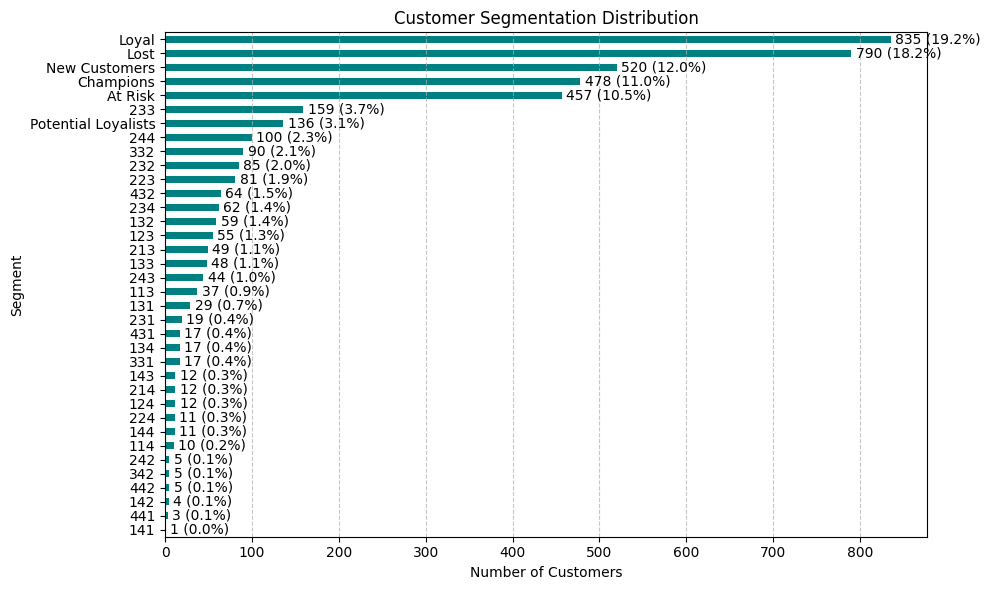

In [ ]:
# Visualize customer segments
def plot_segment_distribution(rfm):
    segment_counts = rfm['Segment'].value_counts().sort_values(ascending=True)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    segment_counts.plot(kind='barh', color='teal', ax=ax)
    
    plt.title('Customer Segmentation Distribution')
    plt.xlabel('Number of Customers')
    plt.ylabel('Segment')
    
    for i, v in enumerate(segment_counts):
        ax.text(v + 5, i, f"{v} ({v/len(rfm):.1%})", 
                color='black', va='center')
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_segment_distribution(rfm)

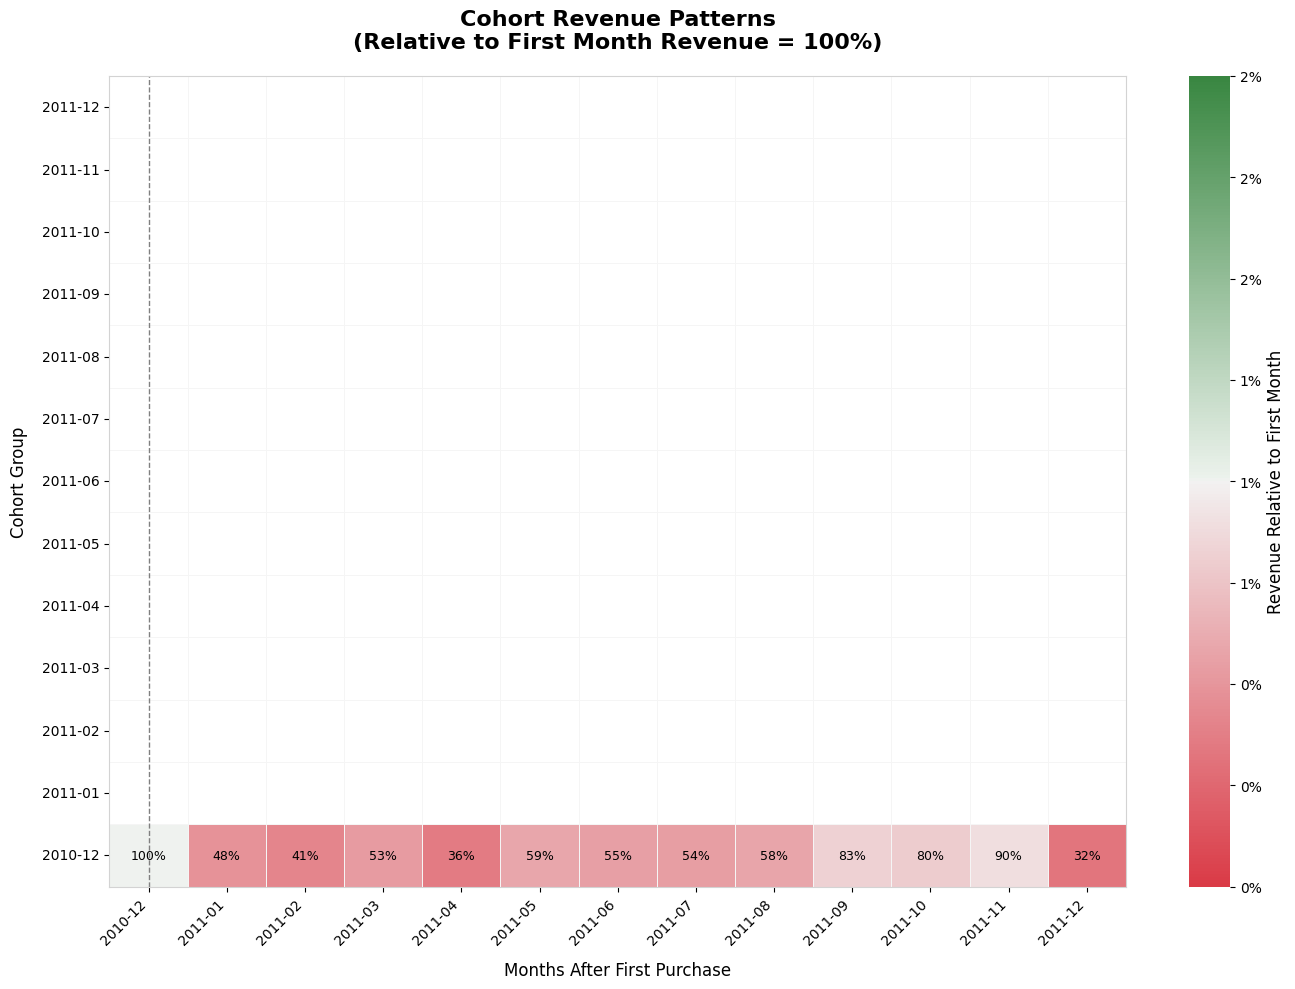

In [ ]:
def analyze_cohort_revenue(df):
    # Calculate monthly revenue per cohort with improved formatting
    cohort_revenue = (df.groupby(['Cohort', 'InvoiceYearMonth'])['TotalSpend']
                        .sum()
                        .unstack()
                        .sort_index(ascending=False))
    
    # Calculate percentage of first month revenue with null handling
    first_month = cohort_revenue.iloc[:, 0]
    cohort_revenue_pct = cohort_revenue.divide(first_month, axis=0)
    
    # Create visualization with enhanced settings
    plt.figure(figsize=(14, 10))
    
    # Custom color palette (diverging from red to green)
    cmap = sns.diverging_palette(10, 130, as_cmap=True)
    
    # Create heatmap with improved parameters
    ax = sns.heatmap(
        cohort_revenue_pct, 
        annot=True, 
        fmt='.0%', 
        cmap=cmap,
        center=1,
        vmin=0,
        vmax=2,
        linewidths=0.5,
        linecolor='whitesmoke',
        cbar_kws={
            'label': 'Revenue Relative to First Month', 
            'format': '%.0f%%'
        },
        annot_kws={
            'size': 9,
            'color': 'black'
        }
    )
    
    # Enhanced titles and labels
    plt.title(
        'Cohort Revenue Patterns\n(Relative to First Month Revenue = 100%)', 
        fontsize=16, 
        pad=20,
        fontweight='semibold'
    )
    plt.ylabel('Cohort Group', fontsize=12, labelpad=10)
    plt.xlabel('Months After First Purchase', fontsize=12, labelpad=10)
    
    # Improve tick labels
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    
    # Add grid lines and borders
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_color('lightgray')
    
    # Adjust color bar
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10)
    cbar.ax.yaxis.label.set_size(12)
    
    # Add reference line after first month
    ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=1)
    
    # Final layout adjustments
    plt.tight_layout()
    plt.show()
    
    # Return the calculated data for further analysis
    return cohort_revenue_pct

# Execute the function
cohort_revenue_analysis = analyze_cohort_revenue(data)

# Predictive Retention Analysis

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       871
           1       1.00      1.00      1.00       431

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302


ROC AUC Score: 1.000


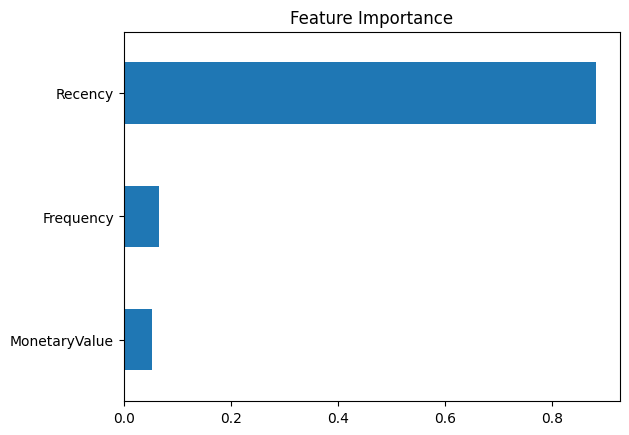

In [36]:
# Predict customer churn using RFM features
def predict_churn(rfm_data):
    # Create target variable (churned = no purchase in last 90 days)
    rfm_data['Churned'] = (rfm_data['Recency'] > 90).astype(int)
    
    # Prepare features and target
    X = rfm_data[['Recency', 'Frequency', 'MonetaryValue']]
    y = rfm_data['Churned']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    
    # Train model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(classification_report(y_test, y_pred))
    print(f"\nROC AUC Score: {roc_auc_score(y_test, y_proba):.3f}")
    
    # Feature importance
    feat_importances = pd.Series(model.feature_importances_,
                                index=X.columns).sort_values()
    feat_importances.plot(kind='barh', title='Feature Importance')
    plt.show()

predict_churn(rfm)

In [40]:
# Generate summary KPI report
def generate_kpi_report(df, rfm_data):
    # Calculate key metrics
    total_customers = df['CustomerID'].nunique()
    repeat_customers = df['CustomerID'].duplicated(keep=False).sum()
    retention_rate = repeat_customers / total_customers
    
    avg_purchase_freq = df.groupby('CustomerID')['InvoiceDate'].nunique().mean()
    avg_customer_lifetime = rfm_data['Recency'].mean()
    
    # Create report
    report = f"""
    {' Customer Retention KPI Report ':=^60}
    
    Total Unique Customers: {total_customers:,}
    Repeat Customers: {repeat_customers:,} ({retention_rate:.1%})
    
    Average Purchase Frequency: {avg_purchase_freq:.1f} purchases/customer
    Average Customer Lifetime: {avg_customer_lifetime:.0f} days
    
    Customer Segments:
    - Champions: {(rfm_data['Segment'] == 'Champions').sum():,}
    - Loyal: {(rfm_data['Segment'] == 'Loyal').sum():,}
    - At Risk: {(rfm_data['Segment'] == 'At Risk').sum():,}
    - Lost: {(rfm_data['Segment'] == 'Lost').sum():,}
    """
    
    print(report)

generate_kpi_report(data, rfm)


    ============== Customer Retention KPI Report ===============
    
    Total Unique Customers: 4,339
    Repeat Customers: 397,852 (9169.2%)
    
    Average Purchase Frequency: 4.3 purchases/customer
    Average Customer Lifetime: 93 days
    
    Customer Segments:
    - Champions: 478
    - Loyal: 835
    - At Risk: 457
    - Lost: 790
    
